# Решатель работы №3.10 "ИЗУЧЕНИЕ СВОБОДНЫХ ЗАТУХАЮЩИХ ЭЛЕКТРОМАГНИТНЫХ КОЛЕБАНИЙ"

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc as mplrc
mplrc('mathtext', fontset="stix")
%matplotlib notebook

## Задание 1

In [2]:
# -- CHANGE THIS -- 
# STAND PARAMETERS, could change
L1 = 10 * np.pow(10.0, -3)
C1, C2, C3, C4 = CC = np.array([0.022, 0.033, 0.047, 0.47]) * np.pow(10.0, -6)

In [3]:
print('$L = 10" мГн" plus.minus 10%$')

$L = 10" мГн" plus.minus 10%$


In [4]:
# -- CHANGE THIS -- 
# -- Resistances, are not likely to change
Rm = np.concat(
    (np.arange(0, 101, 10),
    np.arange(200, 401, 100))
)

In [5]:
# -- CHANGE THIS --
# Таблица 1 столбец 2
T = np.full((14,), 9.2) * np.pow(10.0, -6)

In [6]:
# -- CHANGE THIS --
# Амплитуды
TwoUi = np.array(
    [6.32, 6.10, 5.94,5.70,5.54,5.26,5.12,4.98,4.80,4.64,4.50,3.22,2.32,1.15]
)
TwoUi1 = np.array(
    [4.56, 4.18, 3.86, 3.56, 3.26, 3.00, 2.74, 2.54, 2.32, 2.16, 2.00, 0.92, 0.4, 0.08]
)

In [7]:
lamb = np.log(TwoUi/TwoUi1)

<IPython.core.display.Javascript object>

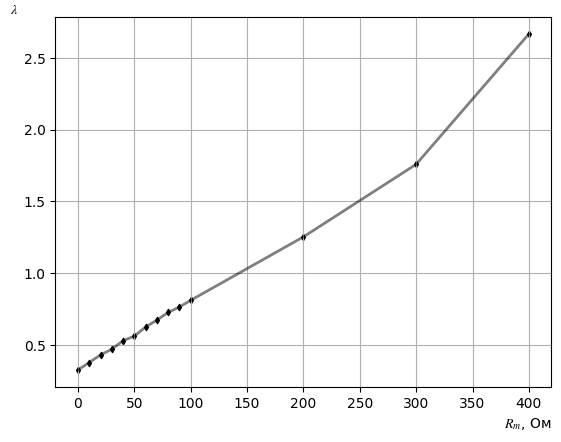

In [8]:
fig = plt.figure()
ax = fig.add_subplot()

ax.plot(Rm, lamb, color="black", linewidth=2, alpha=0.5)
ax.scatter(Rm, lamb, marker="d", color="black", s=10.0)

ax.grid()

ax.set_xlabel("$R_m$, Ом", loc="right")
ax.set_ylabel("$\lambda$", loc="top", rotation=0)
fig.savefig('task4fig1.svg')
fig

Наклон и отсечка аппроксимирующей прямой

In [9]:
_Rm = Rm[:11]
_lamb  = lamb [:11]
_Rm, _lamb

(array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100]),
 array([0.32639658, 0.37797752, 0.43104195, 0.47070563, 0.53026731,
        0.56151874, 0.62519652, 0.67326581, 0.72704873, 0.76460614,
        0.81093022]))

<IPython.core.display.Javascript object>

Наклон прямой $a = 0.00487$, отсечка прямой $b = 0.32912$
Внутреннее сопротивление $R_0 = -R_m |_(lambda = 0) = b / a$ = 67.578$ Ом


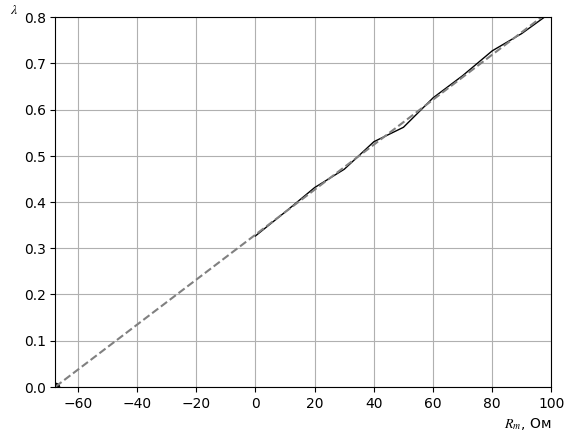

In [10]:
a, b = np.polyfit(_Rm, _lamb, 1)

RL0 = -b / a
RL0

approx_xs = np.concat(((RL0,), _Rm))

fig = plt.figure()
ax = fig.add_subplot()

ax.plot(_Rm, _lamb, color="black", alpha=1, linewidth=1)
ax.plot(approx_xs, a * approx_xs + b, color="grey", linestyle="--", alpha=1)
ax.scatter(RL0, 0, marker='o', color="black")

ax.set_xlim(RL0, 100)
ax.set_ylim(0, 0.8)

ax.grid()

ax.set_xlabel("$R_m$, Ом", loc="right")
ax.set_ylabel("$\lambda$", loc="top", rotation=0)
fig.savefig('task4fig2.svg')

R0 = -RL0
R0

print(f"Наклон прямой $a = {a:.5f}$, отсечка прямой $b = {b:.5f}$")
print(f"Внутреннее сопротивление $R_0 = -R_m |_(lambda = 0) = b / a$ = {R0:.3f}$ Ом")

fig

Полное сопротивление и индуктивность

In [11]:
R = Rm + R0
R

array([ 67.57808851,  77.57808851,  87.57808851,  97.57808851,
       107.57808851, 117.57808851, 127.57808851, 137.57808851,
       147.57808851, 157.57808851, 167.57808851, 267.57808851,
       367.57808851, 467.57808851])

In [12]:
C = C1
L = np.pi**2 * R ** 2 * C / lamb**2
L

array([0.00930771, 0.00914679, 0.00896343, 0.009331  , 0.00893677,
       0.00952021, 0.00904152, 0.00906667, 0.00894621, 0.00922228,
       0.00927235, 0.00990571, 0.00949411, 0.00668154])

In [13]:
Lav = np.average(L)
Lav

np.float64(0.009059736476752367)

Отклонение L от стенда

In [14]:
Delta_percent_L = (Lav - L1)/L1 * 100
Delta_percent_L

np.float64(-9.40263523247633)

Отличается от указанной на 9 с половиной процентов

### Пункт 6

Период колебаний контура при сопротивлениях 0 200 400


In [15]:
index0   = list(Rm).index(0) # 0
index200 = list(Rm).index(200) # 11
index400 = list(Rm).index(400) # 13
index0, index200, index400


(0, 11, 13)

In [16]:
task6LL = np.array((L[index0], L[index200], L[index400]))
task6RR = np.array((Rm[index0], Rm[index200], Rm[index400])) + R0
task6C = C1
task6Tteot = 2*np.pi/np.sqrt(1/(task6LL*task6C) - task6RR**2/(4*task6LL**2))
task6Tteot*1000 # milliseconds
print([f"{task6Tteot[i]*1000:.3f}" for i in range(3)])

['0.090', '0.095', '0.084']


### Пункт 7

Добротность контура

In [17]:
Q = 2*np.pi / (1 - np.exp(-2*lamb))
Q

array([13.10606935, 11.84527629, 10.87585347, 10.30160325,  9.61129437,
        9.31242676,  8.80481605,  8.49240871,  8.19842954,  8.0214935 ,
        7.82981554,  6.84169067,  6.47568486,  6.31373951])

Добротность контура для малых сопротивлений по другой формуле

<IPython.core.display.Javascript object>

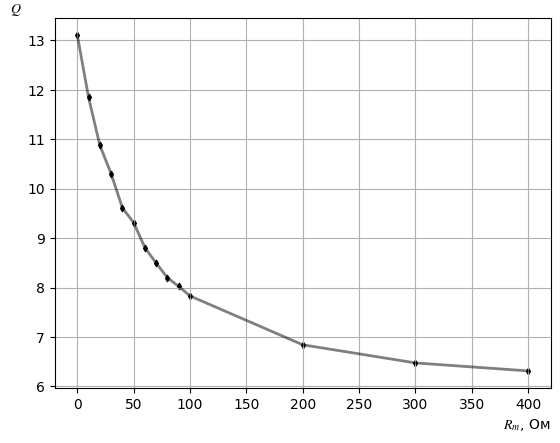

In [18]:

fig = plt.figure()
ax = fig.add_subplot()

ax.plot(Rm, Q, color="black", alpha=.5, linewidth=2)
# ax.plot(approx_xs, a * approx_xs + b, color="grey", linestyle="--", alpha=1)
ax.scatter(Rm, Q, marker='d', color="black", s=10)

ax.grid()

ax.set_xlabel("$R_m$, Ом", loc="right")
ax.set_ylabel("$Q$", loc="top", rotation=0)
fig.savefig('task7fig1.svg')
fig

In [19]:
_R = R[:2]; _L = L[:2]; C = C1
Q_small = (1 / _R) * np.sqrt(_L / C)
Q_small

array([9.62507821, 8.31158587])

Сравнение Добротности по разным формулам

In [20]:
(Q[:2] - Q_small) / Q_small * 100

array([36.16584791, 42.51523683])

Отличаются значительно

### Пункт 8

In [21]:
R_crit_real = np.float64(680) + R0 # Измеренная величина

R_crit = 2 * np.sqrt(Lav / C1)
R_crit_real, R_crit 

print(f'$R_"крит^"эксп" = {R_crit_real:.3f}" Ом"$')
print(f'$R_"крит"^"теор" = {R_crit:.3f}" Ом"$')


$R_"крит^"эксп" = 747.578" Ом"$
$R_"крит"^"теор" = 1283.443" Ом"$


In [22]:
delta_R_crit = (R_crit_real - R_crit) / R_crit * 100

print(f'$delta R_"крит" = {delta_R_crit:.3f}%$')

$delta R_"крит" = -41.752%$


### Пункт 9

In [23]:
# -- CHANGE THIS --
# Таблица 2 столбец 2
T_real = np.array([92, 112, 132, 456]) * np.pow(10.0, -6)

T_teot = 2*np.pi / np.sqrt(1/(Lav*CC)-R0**2/(4*Lav**2))
T_real*1000, T_teot*1000

delta_T = (T_real - T_teot) / T_teot * 100

delta_T


array([3.57047704, 2.87704563, 1.50732585, 7.87485689])

<IPython.core.display.Javascript object>

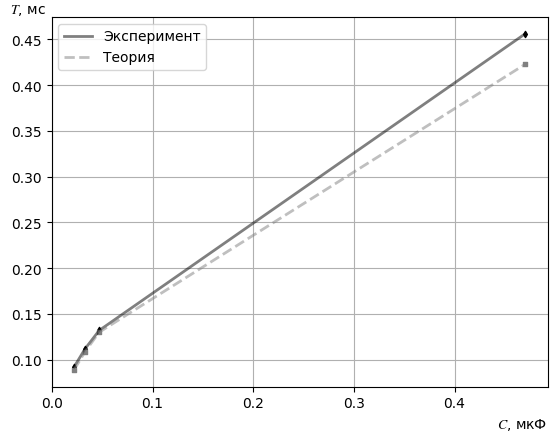

In [24]:
fig = plt.figure()
ax = fig.add_subplot()

ax.plot(CC*10**6, T_real*1000, 
        color="black", 
        linestyle='-',
        linewidth=2,
        alpha=.5,
        label='Эксперимент'
)
ax.scatter(CC*10**6,T_real*1000, marker='d', s=10, color='black')

ax.plot(CC*10**6,T_teot*1000,
    color="grey",
    linestyle='--',
    linewidth=2,
    alpha=.5,
    label='Теория'
)
ax.scatter(CC*10**6, T_teot*1000, marker='s', s=10, color='grey')


ax.set_xlabel('$C$, мкФ', loc='right')
ax.set_ylabel('$T$, мс', loc='top', rotation=0, labelpad=-25)

ax.grid()
ax.legend()
fig.savefig("task9fig1.svg")
fig

#### Генератор таблицы 2

In [25]:
print('#fig(')
print('  table(columns: 4,')
print('  [$C$, мкФ],[$T_"эксп"$, мс],[$T_"теор"$, мс],[$delta T$, %],')
for row in range(4):
    print(f'   [{CC[row]*10**3:.6f}],[{T_real[row]*10**3:.3f}],[{T_teot[row]*10**3:.3f}],[{delta_T[row]:.1f}],')
print('  ),')
print('  caption: [Прямые и косвенные измерения],')
print(') <t2>')

#fig(
  table(columns: 4,
  [$C$, мкФ],[$T_"эксп"$, мс],[$T_"теор"$, мс],[$delta T$, %],
   [0.000022],[0.092],[0.089],[3.6],
   [0.000033],[0.112],[0.109],[2.9],
   [0.000047],[0.132],[0.130],[1.5],
   [0.000470],[0.456],[0.423],[7.9],
  ),
  caption: [Прямые и косвенные измерения],
) <t2>


#### Генератор таблицы 1

In [26]:
print('#figure(')
print('  table(columns: 9,')
print('    [$R_m$, Ом],[$T$, мс],[$2U_i$, дел],[$2U_(i+n)$, дел],[$n$],[$lambda$],[$Q$],[$R$, Ом],[$L$, мГн],')
for row in range(14):
    print(f'    [{Rm[row]:3.0f}],[{T[row]*1000:.4f}],[{TwoUi[row]:4.2f}],[{TwoUi1[row]:4.2f}],[1],[{lamb[row]:.3f}],[{Q[row]:6.3f}],[{R[row]:6.2f}],[{L[row]*1000:.3f}],')
print('  ),')
print('  caption: [Прямые и косвенные измерения]')
print(') <t1>')

#figure(
  table(columns: 9,
    [$R_m$, Ом],[$T$, мс],[$2U_i$, дел],[$2U_(i+n)$, дел],[$n$],[$lambda$],[$Q$],[$R$, Ом],[$L$, мГн],
    [  0],[0.0092],[6.32],[4.56],[1],[0.326],[13.106],[ 67.58],[9.308],
    [ 10],[0.0092],[6.10],[4.18],[1],[0.378],[11.845],[ 77.58],[9.147],
    [ 20],[0.0092],[5.94],[3.86],[1],[0.431],[10.876],[ 87.58],[8.963],
    [ 30],[0.0092],[5.70],[3.56],[1],[0.471],[10.302],[ 97.58],[9.331],
    [ 40],[0.0092],[5.54],[3.26],[1],[0.530],[ 9.611],[107.58],[8.937],
    [ 50],[0.0092],[5.26],[3.00],[1],[0.562],[ 9.312],[117.58],[9.520],
    [ 60],[0.0092],[5.12],[2.74],[1],[0.625],[ 8.805],[127.58],[9.042],
    [ 70],[0.0092],[4.98],[2.54],[1],[0.673],[ 8.492],[137.58],[9.067],
    [ 80],[0.0092],[4.80],[2.32],[1],[0.727],[ 8.198],[147.58],[8.946],
    [ 90],[0.0092],[4.64],[2.16],[1],[0.765],[ 8.021],[157.58],[9.222],
    [100],[0.0092],[4.50],[2.00],[1],[0.811],[ 7.830],[167.58],[9.272],
    [200],[0.0092],[3.22],[0.92],[1],[1.253],[ 6.842],[267.58],[9.906],
    